## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = study_results.join(mouse_metadata.set_index('Mouse ID'), on='Mouse ID')

# Display the data table for preview
display(mouse_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice.
mouse_count = len(pd.unique(mouse_data['Mouse ID']))
print(f'Mouse Count is: {mouse_count}')

Mouse Count is: 249


In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_data = mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mice = pd.unique(dup_mice_data['Mouse ID'])

['g989']


In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
display(mouse_data.loc[mouse_data['Mouse ID'].isin(dup_mice)])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_data.loc[~mouse_data['Mouse ID'].isin(dup_mice)]

Cleaned Mouse Count is: 248


In [17]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(pd.unique(cleaned_mouse_data['Mouse ID']))
print(f'Cleaned Mouse Count is: {cleaned_mouse_count}')

Cleaned Mouse Count is: 248


## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Generate mean of tumor volume
mean_tumor_vol_by_drug = cleaned_mouse_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
mean_tumor_vol_by_drug = mean_tumor_vol_by_drug.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
# Generate median of tumor volue
median_tumor_vol_by_drug = cleaned_mouse_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').median()
median_tumor_vol_by_drug = median_tumor_vol_by_drug.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
# Generate std_dev of tumor volue
std_tumor_vol_by_drug = cleaned_mouse_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').std()
std_tumor_vol_by_drug = std_tumor_vol_by_drug.rename(columns={'Tumor Volume (mm3)':'STD Tumor Volume'})
# Generate standard error of mean of tumor volue
sem_tumor_vol_by_drug = cleaned_mouse_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').sem()
sem_tumor_vol_by_drug = sem_tumor_vol_by_drug.rename(columns={'Tumor Volume (mm3)':'SEM Tumor Volume'})
# Assemble the resulting series into a single summary dataframe.
summary_data = pd.concat([mean_tumor_vol_by_drug,median_tumor_vol_by_drug,std_tumor_vol_by_drug,sem_tumor_vol_by_drug], axis=0)

display(summary_data)



,Mean Tumor Volume,Median Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,NaN,NaN,NaN
Ceftamin,52.591172,NaN,NaN,NaN
Infubinol,52.884795,NaN,NaN,NaN
Ketapril,55.235638,NaN,NaN,NaN
Naftisol,54.331565,NaN,NaN,NaN
Placebo,54.033581,NaN,NaN,NaN
Propriva,52.320930,NaN,NaN,NaN
Ramicane,40.216745,NaN,NaN,NaN
Stelasyn,54.233149,NaN,NaN,NaN


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_data = pd.concat([mean_tumor_vol_by_drug,median_tumor_vol_by_drug,std_tumor_vol_by_drug,sem_tumor_vol_by_drug], axis=1)

display(summary_data)



,Mean Tumor Volume,Median Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

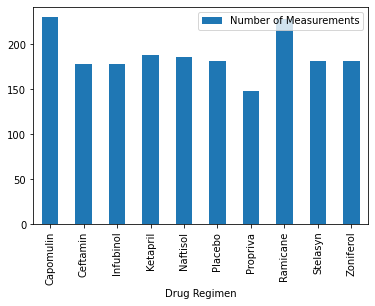

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_by_drug = cleaned_mouse_data[['Drug Regimen','Mouse ID']].groupby('Drug Regimen').count()
count_by_drug = count_by_drug.rename(columns={'Mouse ID': 'Number of Measurements'})
display(count_by_drug.plot.bar())


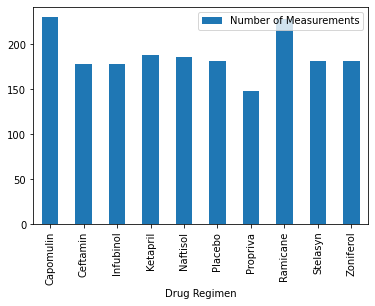

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count_by_drug.plot(kind='bar')

plt.show()


<AxesSubplot:ylabel='Sex'>

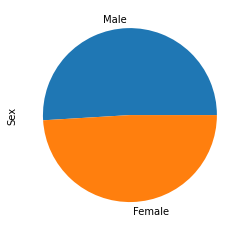

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_by_sex = cleaned_mouse_data['Sex'].value_counts()
display(count_by_sex.plot.pie())

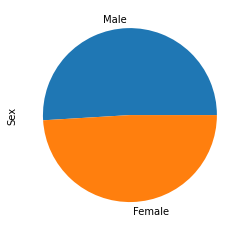

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_by_sex.plot(kind='pie')

plt.show()


## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mouse_data_only_regimen_list = mouse_data.loc[mouse_data['Drug Regimen'].isin(regimen_list)]
# Start by getting the last (greatest) timepoint for each mouse
max_by_mouse_only_regimen_list = mouse_data_only_regimen_list.groupby('Mouse ID')['Tumor Volume (mm3)'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
display(max_by_mouse_only_regimen_list)

Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    45.466677
a444    45.000000
          ...    
y769    68.594745
y793    45.000000
y865    64.729837
z578    45.000000
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [52]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
